In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls nyiso_price/20180101realtime_zone_csv/

20180101realtime_zone.csv 20180110realtime_zone.csv 20180119realtime_zone.csv
20180102realtime_zone.csv 20180111realtime_zone.csv 20180120realtime_zone.csv
20180103realtime_zone.csv 20180112realtime_zone.csv 20180121realtime_zone.csv
20180104realtime_zone.csv 20180113realtime_zone.csv 20180122realtime_zone.csv
20180105realtime_zone.csv 20180114realtime_zone.csv 20180123realtime_zone.csv
20180106realtime_zone.csv 20180115realtime_zone.csv 20180124realtime_zone.csv
20180107realtime_zone.csv 20180116realtime_zone.csv 20180125realtime_zone.csv
20180108realtime_zone.csv 20180117realtime_zone.csv
20180109realtime_zone.csv 20180118realtime_zone.csv


In [4]:
df_int = pd.read_csv('nyiso_price/' + '20180101realtime_zone_csv/' + '20180101realtime_zone.csv', parse_dates = ['Time Stamp'])

In [10]:
df_int.head(15)

,Time Stamp,Name,PTID,LBMP ($/MWHr),Marginal Cost Losses ($/MWHr),Marginal Cost Congestion ($/MWHr)
0,2018-01-01 00:05:00,CAPITL,61757,156.00,3.64,-108.51
1,2018-01-01 00:05:00,CENTRL,61754,56.90,-0.66,-13.71
2,2018-01-01 00:05:00,DUNWOD,61760,128.64,3.33,-81.46
3,2018-01-01 00:05:00,GENESE,61753,51.75,-2.33,-10.22
4,2018-01-01 00:05:00,H Q,61844,43.33,-0.52,0.00
5,2018-01-01 00:05:00,HUD VL,61758,128.47,3.38,-81.24
6,2018-01-01 00:05:00,LONGIL,61762,129.03,3.64,-81.54
7,2018-01-01 00:05:00,MHK VL,61756,61.74,1.71,-16.18
8,2018-01-01 00:05:00,MILLWD,61759,129.83,3.55,-82.43
9,2018-01-01 00:05:00,N.Y.C.,61761,129.10,3.73,-81.52


In [11]:
nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'LBMP ($/MWHr)']].reset_index(drop = True)

In [12]:
df_nyc.head()

,Time Stamp,LBMP ($/MWHr)
0,2018-01-01 00:05:00,129.10
1,2018-01-01 00:10:00,135.16
2,2018-01-01 00:15:00,125.70
3,2018-01-01 00:20:00,125.04
4,2018-01-01 00:25:00,119.07


In [13]:
df_nyc.columns = ['time_stamp', 'lbmp_price']

In [14]:
df_nyc.set_index('time_stamp', inplace = True)

df_nyc['time_stamp_local'] = df_nyc.index

df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern'), inplace = True)

In [15]:
df_nyc.head()

,lbmp_price,time_stamp_local
time_stamp,,
2018-01-01 00:05:00-05:00,129.10,2018-01-01 00:05:00
2018-01-01 00:10:00-05:00,135.16,2018-01-01 00:10:00
2018-01-01 00:15:00-05:00,125.70,2018-01-01 00:15:00
2018-01-01 00:20:00-05:00,125.04,2018-01-01 00:20:00
2018-01-01 00:25:00-05:00,119.07,2018-01-01 00:25:00


In [16]:
df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)

In [17]:
df_nyc.head()

,lbmp_price,time_stamp_local
time_stamp,,
2018-01-01 05:05:00+00:00,129.10,2018-01-01 00:05:00
2018-01-01 05:10:00+00:00,135.16,2018-01-01 00:10:00
2018-01-01 05:15:00+00:00,125.70,2018-01-01 00:15:00
2018-01-01 05:20:00+00:00,125.04,2018-01-01 00:20:00
2018-01-01 05:25:00+00:00,119.07,2018-01-01 00:25:00


In [18]:
def select_nyc(dir_path, filename):
    df_int = pd.read_csv(dir_path + filename, parse_dates = ['Time Stamp'])#, dtype={'Integrated Load' : np.float64})
    nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
    df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'LBMP ($/MWHr)']].reset_index(drop = True)
    df_nyc.columns = ['time_stamp', 'lbmp_price']
    df_nyc.set_index('time_stamp', inplace = True)
    df_nyc['time_stamp_local'] = df_nyc.index
    df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern', ambiguous='infer'), inplace = True)
    df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)
    output_filename = filename[:8] + 'nyc.csv'
    df_nyc.to_csv(dir_path + output_filename)
    return df_nyc

In [19]:
df_t = pd.DataFrame()
for dir_path in os.listdir('nyiso_price/'):
    if 'csv' in dir_path:
        dir_path = 'nyiso_price/' + dir_path + '/'
        for filename in os.listdir(dir_path):
            if 'realtime' in filename:
                df_t = pd.concat([df_t, select_nyc(dir_path, filename)])
                #select_nyc(dir_path, filename)

In [20]:
df_t.head()

,lbmp_price,time_stamp_local
time_stamp,,
2018-01-12 05:05:00+00:00,27.60,2018-01-12 00:05:00
2018-01-12 05:10:00+00:00,30.77,2018-01-12 00:10:00
2018-01-12 05:15:00+00:00,28.95,2018-01-12 00:15:00
2018-01-12 05:20:00+00:00,25.63,2018-01-12 00:20:00
2018-01-12 05:25:00+00:00,27.02,2018-01-12 00:25:00


In [21]:
df_t.dtypes

lbmp_price                 float64
time_stamp_local    datetime64[ns]
dtype: object

In [108]:
def is_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return 0.

In [110]:
df_t.loc[:,'integrated_load'] = df_t.integrated_load.apply(is_number)

In [46]:
#df_cmp = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp'])

(736274.0, 736275.0)

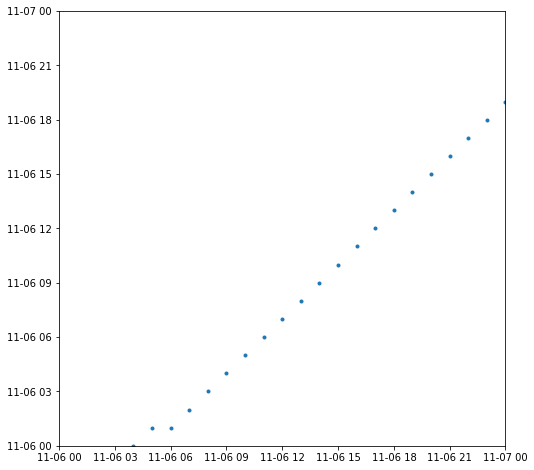

In [111]:
fig, ax = plt.subplots(figsize = (8, 8))
#ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
ax.plot(df_t.index, df_t.loc[:,'time_stamp_local'], '.', label = 'GMT')
# ax.set_xlim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
# ax.set_ylim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
ax.set_xlim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))
ax.set_ylim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))

(0, 500)

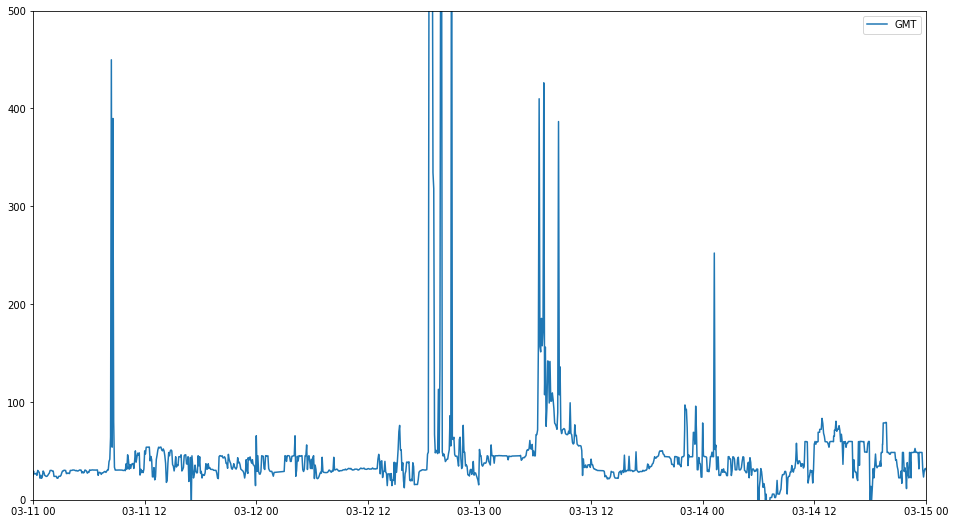

In [50]:
fig, ax = plt.subplots(figsize = (16, 9))
#ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'lbmp_price'], label = 'GMT')
#ax.plot(df_cmp.iloc[:,0], df_cmp.iloc[:,1], '.', label = 'EST')
ax.legend()
ax.set_xlim(pd.datetime(2017,3,11), pd.datetime(2017,3,15))
ax.set_ylim(0, 500)

In [23]:
df_t.shape

(113161, 2)

In [24]:
df_t.dtypes

lbmp_price                 float64
time_stamp_local    datetime64[ns]
dtype: object

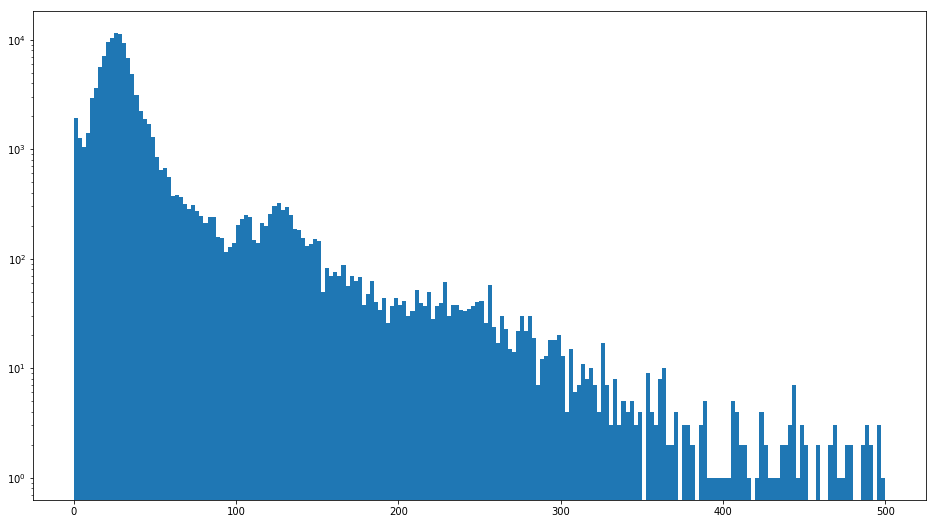

In [55]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.hist(df_t.lbmp_price, bins = 200, range= [0, 500], log = True);

In [26]:
df_t.sort_index(inplace = True)

In [27]:
df_t.head()

,lbmp_price,time_stamp_local
time_stamp,,
2017-01-01 05:05:00+00:00,32.66,2017-01-01 00:05:00
2017-01-01 05:10:00+00:00,30.54,2017-01-01 00:10:00
2017-01-01 05:15:00+00:00,34.23,2017-01-01 00:15:00
2017-01-01 05:20:00+00:00,32.10,2017-01-01 00:20:00
2017-01-01 05:25:00+00:00,32.09,2017-01-01 00:25:00


In [28]:
df_t.tail()

,lbmp_price,time_stamp_local
time_stamp,,
2018-01-25 19:15:00+00:00,30.12,2018-01-25 14:15:00
2018-01-25 19:30:00+00:00,29.97,2018-01-25 14:30:00
2018-01-25 19:45:00+00:00,29.78,2018-01-25 14:45:00
2018-01-25 20:00:00+00:00,41.62,2018-01-25 15:00:00
2018-01-25 20:15:00+00:00,41.34,2018-01-25 15:15:00


In [29]:
df_t.to_csv('nyiso_price_2017.csv')

In [1]:
df_test = pd.read_csv('nyiso_price_2017.csv', parse_dates=['time_stamp', 'time_stamp_local'])

In [2]:
df_test.head()

,time_stamp,lbmp_price,time_stamp_local
0,2017-01-01 05:05:00,32.66,2017-01-01 00:05:00
1,2017-01-01 05:10:00,30.54,2017-01-01 00:10:00
2,2017-01-01 05:15:00,34.23,2017-01-01 00:15:00
3,2017-01-01 05:20:00,32.10,2017-01-01 00:20:00
4,2017-01-01 05:25:00,32.09,2017-01-01 00:25:00


In [32]:
df_test.time_stamp.dtype

dtype('<M8[ns]')

In [5]:
may1st_index_price = df_test.time_stamp_local >= pd.datetime(2017, 5, 1)
df_test = df_test.loc[may1st_index_price, :]

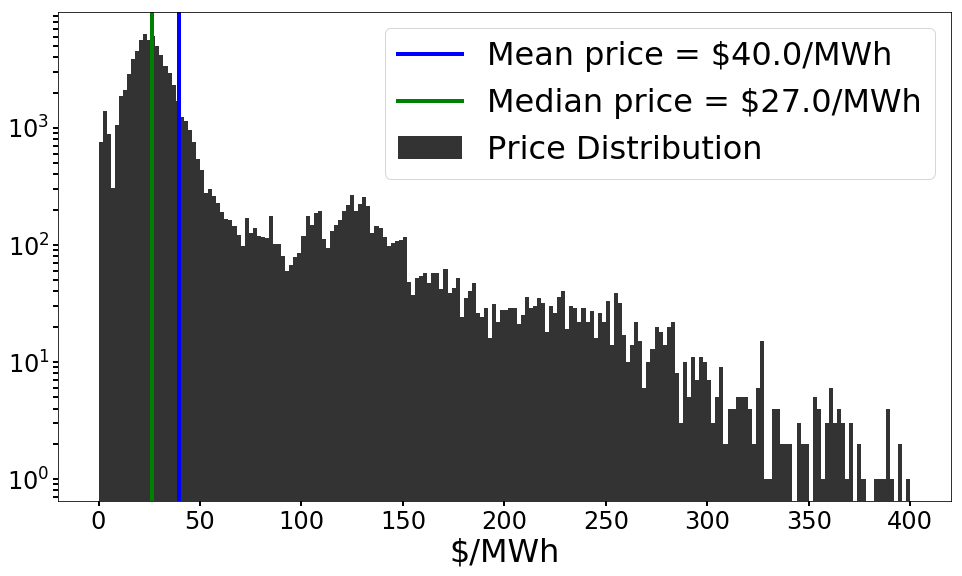

In [37]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.hist(df_test.lbmp_price, bins = 200, range= [0, 400], log = True, color = 'black', alpha = 0.8, label = 'Price Distribution');
ax.tick_params(axis='both',which='both',labelsize=24,\
        length=5,width=2,direction='out');
ax.axvline(x = np.mean(df_test.lbmp_price), color = 'blue', linewidth = 4, label = 'Mean price = $' + str(np.around(np.mean(df_test.lbmp_price), decimals=0)) + '/MWh')
ax.axvline(x = np.median(df_test.lbmp_price), color = 'green', linewidth = 4, label = 'Median price = $' + str(np.around(np.median(df_test.lbmp_price), decimals=0)) + '/MWh')
ax.legend(fontsize = 32)
ax.set_xlabel('$/MWh', fontsize = 32)
plt.savefig('price_dist_2017.pdf', format = 'pdf')